# Complex Networks - A2
### Networked Markets
###### Rafael Barsotti

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

##### Para simularmos uma economia primeiro construiremos um grafo bipartido representando uma rede, onde de um lado teremos os compradores e do outro lado teremos os vendedores. A cada rodada os vendedores e compradores irão se alternar para oferecer preços de venda  e compra respectivamente como num leilão. Assim a cada rodada par alguns compradores irão aceitar as ofertas de vendedores ligados a eles e outros não, o mesmo será analogo para rodadas ímpares.

In [50]:
def random_exchange_network(buyers,sellers):
    if buyers > sellers:
        G = np.zeros((buyers,2))
        G[:,0] = np.arange(buyers)
        G[:,1] = np.random.random_integers(sellers+2,buyers,buyers)
    else:
        G = np.zeros((sellers,2))
        G[:,0] = np.arange(sellers)
        G[:,1] = np.random.random_integers(buyers+2,sellers,sellers)
    return G

# Plot Network 
def network_plot(G):
    df = pd.DataFrame(G, columns=['Buyers', 'Sellers'])
    df = df.astype(int)
    G = nx.from_pandas_dataframe(df,'Buyers','Sellers')
    nx.draw(G, with_labels = True)
    plt.show()

# Simulador do jogo Corominas Bosh
def corominas_bosh(G,delta,p0_buyer,p0_seller,tmax):
    G_trades = np.zeros((1,4))
    for t in range(1,tmax):
        u1 = np.random.uniform(0,1)
        if t%2 == 0:
            p_buyer = p0_buyer * 1.01
            payoff_buyer = delta**t * (1-p)
            G_trades = np.append(G,[[t,buyer,seller,payoff_buyer,payoff_seller]],axis = 0)
        else:
            p_seller = p0_seller * 0.99 
            payoff_seller = delta**t * p
            G_trades = np.append(G,[[t,buyer,seller,payoff_buyer,payoff_seller]],axis = 0)
    print("O payoff final dos compradores foi {}".format(payoff_buyer))
    print("O payoff final dos vendedores foi {}".format(payoff_seller))

###### Simulaçao Rede Pequena com Poucas Rodadas

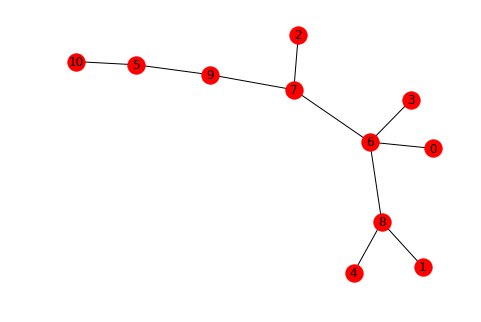

O payoff final dos compradores foi 0.34
O payoff final dos vendedores foi 0.85


In [77]:
# Buyers = 10 
# Seller = 3
# tmax = 100
G = random_exchange_network(10,3)
network_plot(G)
corominas_bosh(G,0.5,1,100,100)

##### Simulação Rede Grande Com Muitas Rodadas

In [74]:
# Buyers = 1000 
# Seller = 150
# tmax = 10000
G = random_exchange_network(1000,150)
corominas_bosh(G,0.5,1,1000,10000)

O payoff final dos compradores foi 0.002
O payoff final dos vendedores foi 0.977
